In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

crimes_df = pd.read_csv(
    "./base_crim16_08.csv"
)  # parse_dates=["fecha_hecho"], delimiter=";")

# Select relevant features
features = [
    "fecha_hecho",
    "fecha",
    "codigo_barrio",
    "year",
    "mes",
    "dia",
    "hora",
    "minuto",
    "latitud",
    "longitud",
    "conducta",
]
crimes_df = crimes_df[features]

# print('dates: ', str(crimes_df.fecha.describe()))
print("crimes_df data shape ", crimes_df.shape)

# describe data and see if there are missing values
print(crimes_df.isnull().sum())  # check for missing values
crimes_df = crimes_df.dropna()  # drop missing values
crimes_df = crimes_df.drop_duplicates()  # elimianr los datos repetidos
# print("\ncrimes dtypes: ", crimes_df.dtypes)

# ?_____________________________________________________________________________ characteristcs
characteristics = pd.read_excel("./characteristics_edad.xlsx")
# print("\ncharact dtypes: ", characteristics.dtypes)

# data = pd.read_csv("./base_crim16_08.csv")
crimes_df["fecha_hecho"] = pd.to_datetime(
    crimes_df["fecha_hecho"], format="%d/%m/%Y %H:%M"
)

# DATE TIME STAMP FUNCTION
column_1 = crimes_df.iloc[:, 0]

db = pd.DataFrame(
    {
        "dayofyear": column_1.dt.dayofyear,
        "week": column_1.dt.isocalendar().week,
        "weekofyear": column_1.dt.isocalendar().week,
        "dayofweek": column_1.dt.dayofweek,
        "weekday": column_1.dt.weekday,
        "quarter": column_1.dt.quarter,
    }
)


# crimes_df=crimes_df.drop('fecha_hecho',axis=1)
crimes_df = pd.concat([db, crimes_df], axis=1)

data = pd.get_dummies(crimes_df.conducta)

crimes_df = pd.concat([data, crimes_df], axis=1)
crimes_df.head()

crimes_df data shape  (377282, 11)
fecha_hecho          0
fecha                0
codigo_barrio        0
year                 0
mes                  0
dia                  0
hora                 0
minuto               0
latitud          24239
longitud         24239
conducta             0
dtype: int64


,Extorsión,Homicidio,Hurto a persona,Hurto a residencia,Hurto de carro,dayofyear,week,weekofyear,dayofweek,weekday,...,fecha,codigo_barrio,year,mes,dia,hora,minuto,latitud,longitud,conducta
0,False,False,False,False,True,2,1,1,0,0,...,2/01/2017,1006,2017,1,2,17,30,6.251426,-75.570280,Hurto de carro
1,False,False,False,False,True,2,1,1,0,0,...,2/01/2017,519,2017,1,2,18,0,6.274359,-75.578320,Hurto de carro
2,False,False,False,False,True,2,1,1,0,0,...,2/01/2017,710,2017,1,2,15,30,6.283381,-75.580012,Hurto de carro
3,False,False,False,False,True,3,1,1,1,1,...,3/01/2017,809,2017,1,3,0,15,6.246295,-75.552469,Hurto de carro
4,False,False,False,False,True,3,1,1,1,1,...,3/01/2017,1004,2017,1,3,15,0,6.262067,-75.570167,Hurto de carro


In [15]:
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222650 entries, 0 to 377281
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Extorsión           222650 non-null  bool          
 1   Homicidio           222650 non-null  bool          
 2   Hurto a persona     222650 non-null  bool          
 3   Hurto a residencia  222650 non-null  bool          
 4   Hurto de carro      222650 non-null  bool          
 5   dayofyear           222650 non-null  int32         
 6   week                222650 non-null  UInt32        
 7   weekofyear          222650 non-null  UInt32        
 8   dayofweek           222650 non-null  int32         
 9   weekday             222650 non-null  int32         
 10  quarter             222650 non-null  int32         
 11  fecha_hecho         222650 non-null  datetime64[ns]
 12  fecha               222650 non-null  object        
 13  codigo_barrio       222650 non-nul

### Data

In [3]:
X = crimes_df.iloc[:, [5, 8, 17, 15, 6, 19, 20]].values
# X=data1.iloc[:,[1,2,3,4,6,16,17]].values
X

array([[2, 0, 17, ..., 1, 6.251426, -75.5702801],
       [2, 0, 18, ..., 1, 6.2743592, -75.57831969],
       [2, 0, 15, ..., 1, 6.28338118, -75.58001217],
       ...,
       [363, 3, 14, ..., 52, 6.197512, -75.575904],
       [364, 4, 11, ..., 52, 6.182263, -75.550108],
       [365, 5, 0, ..., 52, 6.23967418, -75.5887653]], dtype=object)

In [4]:
y = crimes_df.iloc[:, [0, 1, 2, 3, 4]].values
# y=data1.iloc[:,[10,11,12,13,14,15]].values
y

array([[False, False, False, False,  True],
       [False, False, False, False,  True],
       [False, False, False, False,  True],
       ...,
       [False, False, False,  True, False],
       [False, False, False,  True, False],
       [False, False, False,  True, False]])

In [5]:
## Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)

### Creating & Training KNN Model

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [22]:
knn.score(X_test,y_test)

0.7261396811138559

In [23]:
knn.score(X_train,y_train)

0.7336290141477656

### Elbow Method For optimum value of K

In [24]:
error_rate = []
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

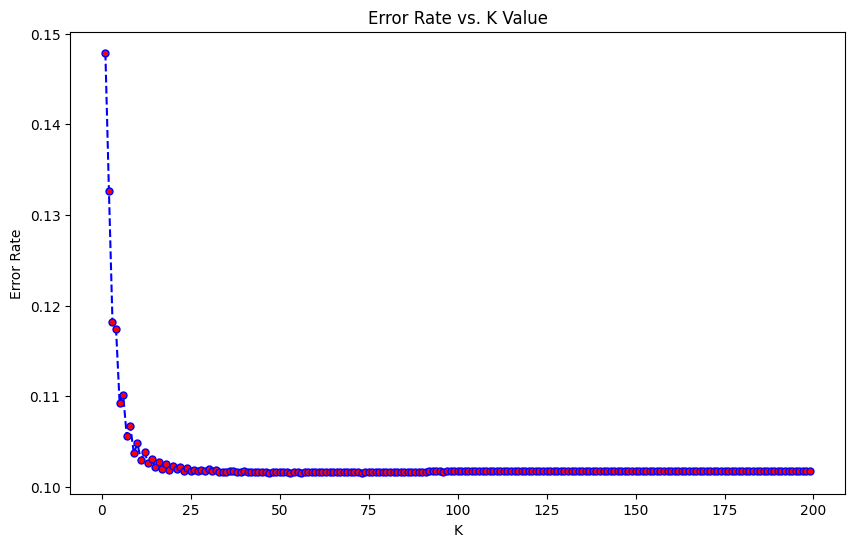

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,200),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [27]:
## GUARDAR EL MODELO utilizando joblib
import joblib

# Guardar el modelo y la lista en un archivo
model_filename = 'knn_model_pred.joblib'
joblib.dump(knn, model_filename)
np.save('error_rate.npy', error_rate)


### Creating & Training Decision Tree Model

In [1]:
# cargar modelo joblib
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns


# cargar modelo joblib
model = joblib.load('knn_model_pred.joblib')

In [6]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=500, random_state=300)

In [7]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=500, random_state=300)

In [8]:
y_pred=dtree.predict(X_test)

In [9]:
dtree.score(X_test,y_test)

0.6241634852908152

In [10]:
dtree.score(X_train,y_train)

0.9934987648776106

In [11]:
y_pred

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False,  True, False, False, False],
       ...,
       [False, False,  True, False, False],
       [False, False, False, False,  True],
       [False, False, False, False,  True]])

In [12]:
treefeatures=dtree.feature_importances_
indices = np.argsort(treefeatures)
treefeatures

array([0.13919683, 0.08261509, 0.1083887 , 0.03827759, 0.0804828 ,
       0.26816749, 0.2828715 ])

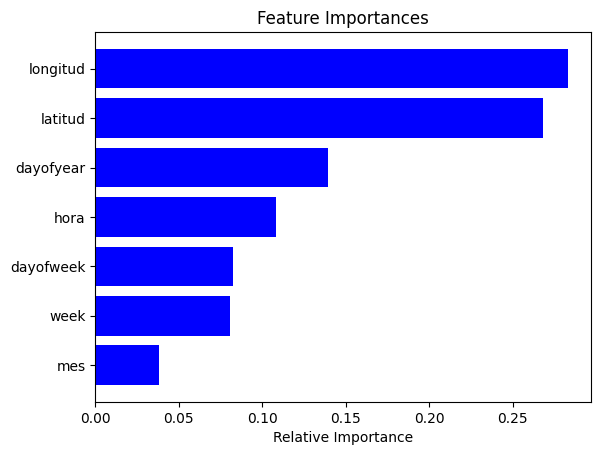

In [14]:
# Convert numpy array to a list of strings (if needed)
# feature_labels = features[indices].tolist()

indices = [3, 4, 1, 2, 0, 5, 6]  # Your list of indices

features = crimes_df.iloc[:, [5, 8, 17, 15, 6, 19, 20]]

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), [treefeatures[i] for i in indices], color='b', align='center')
plt.yticks(range(len(indices)), [features.columns[i] for i in indices])  # Use the actual column names
plt.xlabel('Relative Importance')
plt.show()  # Display the plot


### Creating & Training Random Tree Model

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

y_pred=rfc.predict(X_test)
rfc.score(X_test,y_test)

0.6929261172243432

In [33]:
print(X_test[0])

[251 0 15 9 37 6.29901072 -75.56958042]


In [22]:
rfc.score(X_train,y_train)

0.9959914664271278

In [23]:
om=rfc.feature_importances_
indices = np.argsort(om)

In [24]:
om

array([0.16473984, 0.07730553, 0.11737901, 0.03285611, 0.09093192,
       0.24853113, 0.26825645])

In [27]:
features = crimes_df.columns
features

Index(['Extorsión', 'Homicidio', 'Hurto a persona', 'Hurto a residencia',
       'Hurto de carro', 'dayofyear', 'week', 'weekofyear', 'dayofweek',
       'weekday', 'quarter', 'fecha_hecho', 'fecha', 'codigo_barrio', 'year',
       'mes', 'dia', 'hora', 'minuto', 'latitud', 'longitud', 'conducta'],
      dtype='object')

Text(0.5, 0, 'Relative Importance')

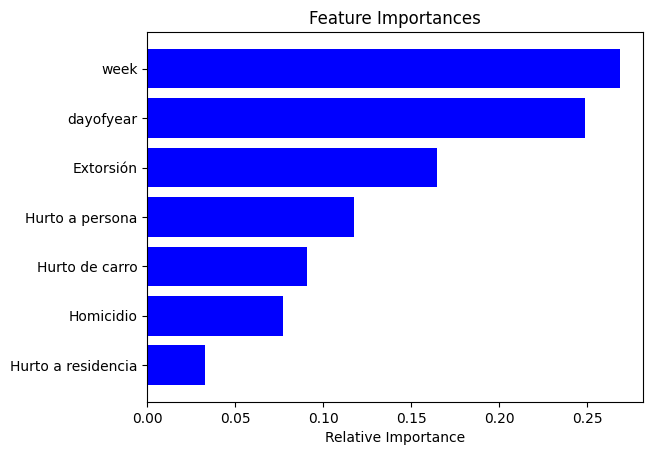

In [26]:
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), om[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [34]:
# Save model
import joblib
joblib.dump(rfc, 'crime_prediction_v2.joblib')


['crime_prediction_v2.joblib']

### Predict

In [47]:
import pandas as pd
import numpy as np

def predict_crime(date_str, lat, lon, model):
    # Convert string date to datetime object
    date_obj = pd.to_datetime(date_str, format="%d/%m/%Y %H:%M")
    
    # Extract relevant date features
    dayofyear = date_obj.dayofyear
    dayofweek = date_obj.dayofweek
    hour = date_obj.hour
    month = date_obj.month
    week = date_obj.isocalendar().week
    
        
    print(dayofyear, dayofweek, hour, month, week, lat, lon)
        
    # Create a sample for prediction
    
    # [251, 0, 15, 9, 37, 6.29901072, -75.56958042]
    # [dayofyear, dayofweek, hour, month, week, lat, lon]
    sample = np.array([[dayofyear, dayofweek, hour, month, week, lat, lon]])
    
    # Make a prediction using the provided model
    prediction = model.predict(sample)
    
    return prediction

# cargar modelo joblib
# model = joblib.load('crime_prediction_v2.joblib')

result = predict_crime("15/08/2020 8:30", 6.29901072, -75.56958042, rfc)
print(result)


228 5 8 8 33 6.29901072 -75.56958042
[[False False  True False False]]
